In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [93]:
df = pd.read_csv('Churn_Modelling.csv')

In [94]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [95]:
cols_to_use= [ "CreditScore", "Geography","Gender", "Age", "Tenure", "Balance","NumOfProducts", "IsActiveMember","EstimatedSalary","Exited"]
df=df[cols_to_use]

In [96]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])

In [97]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,1,112542.58,0
2,502,0,0,42,8,159660.80,3,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,79084.10,0


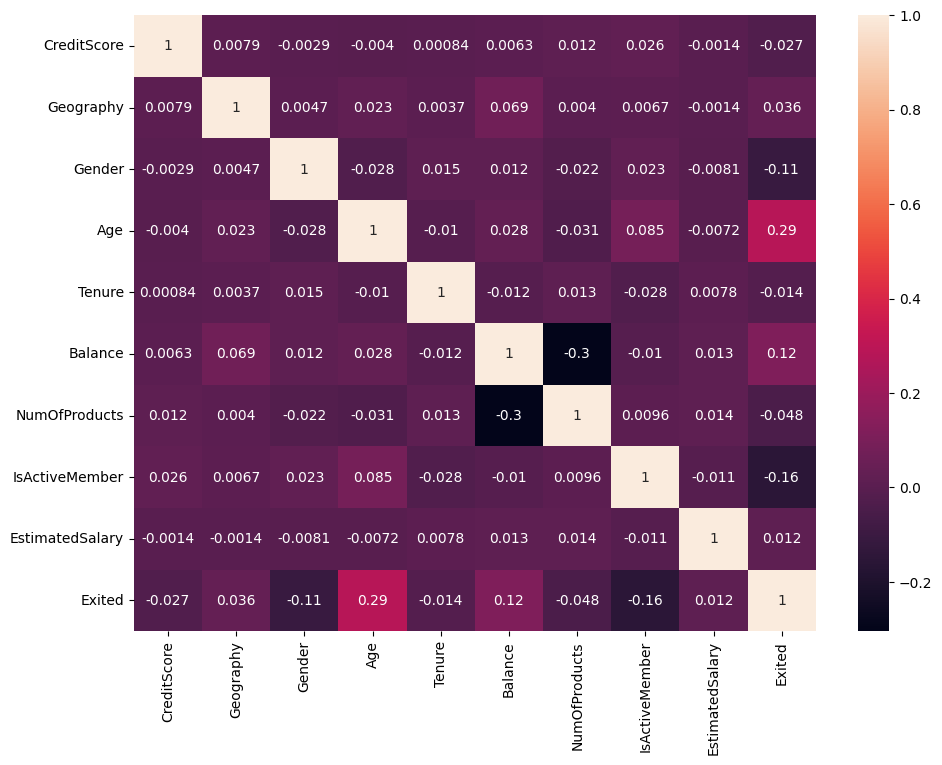

In [98]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

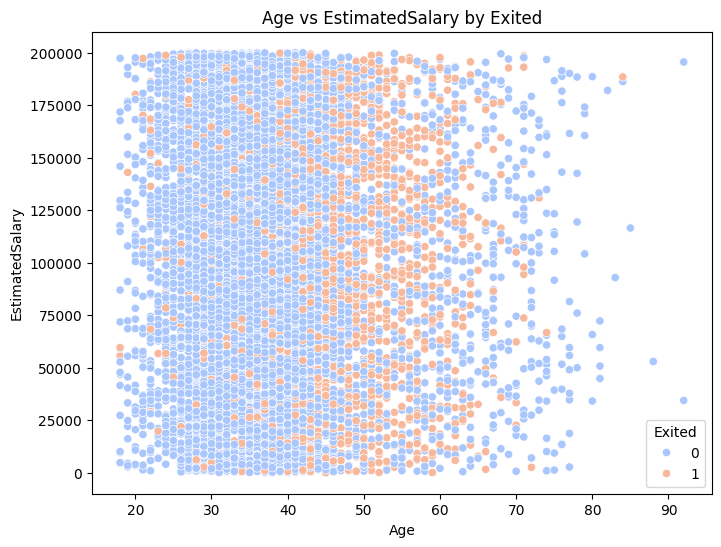

In [99]:
# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Exited', palette='coolwarm')
plt.title('Age vs EstimatedSalary by Exited')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

### =>Age, Geography, Balance, EstimatedSalary are highly correlation with Exited

In [100]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [101]:
df['Age'] = pd.cut(df['Age'], bins = [15, 25, 35,45,55,65, 75, 85, 95], labels = ['15-25','26-35', '36-45', '46-55', '56-65','66-75', '76-85', '86-95'])

In [102]:
df.Age.value_counts()

Age
36-45    3736
26-35    3542
46-55    1311
15-25     611
56-65     536
66-75     219
76-85      42
86-95       3
Name: count, dtype: int64

# Data Distribution

###  Cho thấy được trong tập dữ liệu khách hàng trung thành nhiều gấp 4 lần so với khách hàng rời bỏ
    => Cứ 4 khách hàng trung thành thì sẽ có 1 khách hàng rời bỏ

In [103]:
df.groupby('Exited')['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

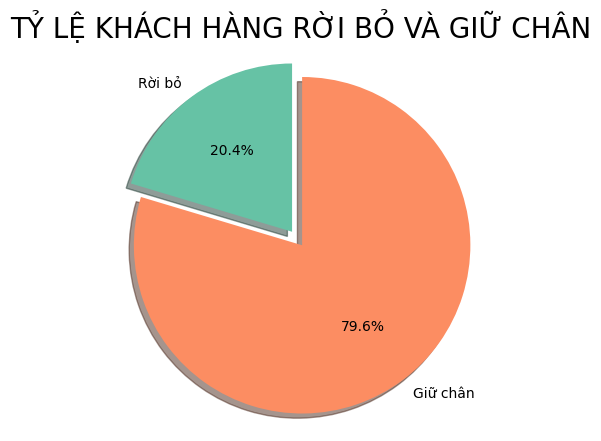

In [104]:
labels = 'Rời bỏ', 'Giữ chân'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("TỶ LỆ KHÁCH HÀNG RỜI BỎ VÀ GIỮ CHÂN", size = 20)
plt.show()

In [105]:
df['Exited'].shape

(10000,)

<Axes: title={'center': 'Exited Distribution'}, xlabel='Exited'>

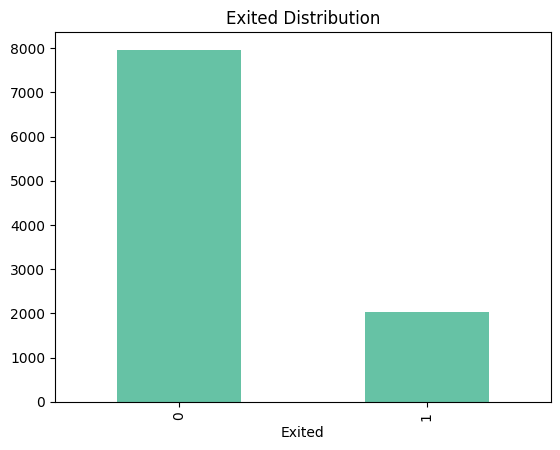

In [106]:
plt.title('Exited Distribution')
exited = df.groupby('Exited')['Exited'].count()
exited.plot(kind='bar')

# Churn Rate

C:\Users\Huynhtu\AppData\Local\Temp\ipykernel_13444\2089210546.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df.groupby(column)['Exited'].mean()


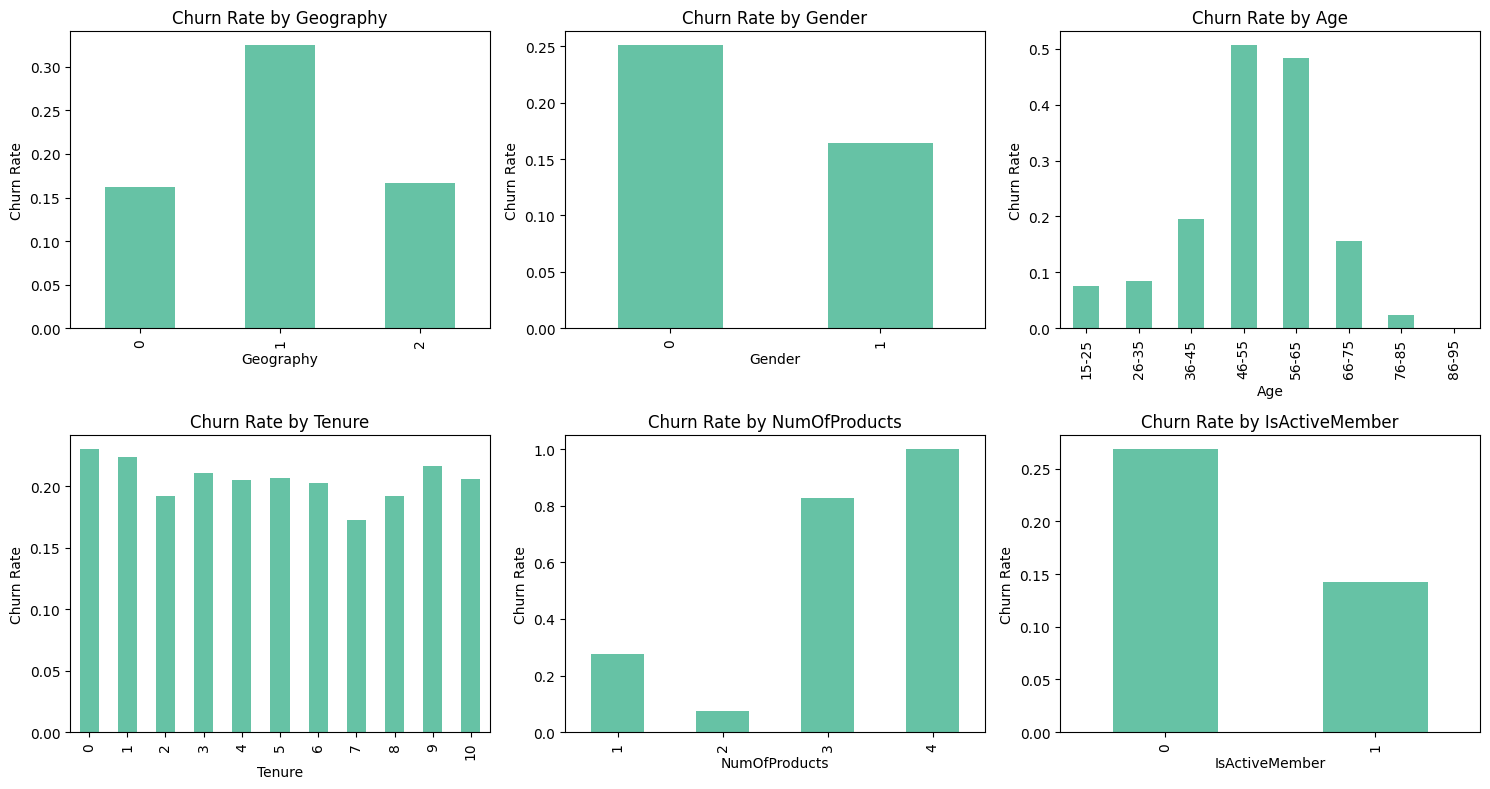

In [107]:
def churn_rate_by_group(df, column, ax):
    churn_rates = df.groupby(column)['Exited'].mean()
    churn_rates.plot(kind='bar', ax=ax)
    ax.set_title('Churn Rate by ' + column)
    ax.set_xlabel(column)
    ax.set_ylabel('Churn Rate')

fig, axes = plt.subplots(2,3, figsize=(15, 8))
# Sử dụng hàm để vẽ biểu đồ tỷ lệ hủy theo nhóm
churn_rate_by_group(df, 'Geography', axes[0,0])
churn_rate_by_group(df, 'Gender', axes[0,1])
churn_rate_by_group(df, 'Age', axes[0,2], )
churn_rate_by_group(df, 'Tenure', axes[1,0])
churn_rate_by_group(df, 'NumOfProducts', axes[1,1])
churn_rate_by_group(df, 'IsActiveMember', axes[1,2])
plt.tight_layout()
plt.show()

### 0:France    1:Germarny     2:Spain

# Tỉ lệ của Exited trong các cột dữ liệu khác

In [108]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("tab20", 8))
    tab1 = pd.crosstab(x,df['Exited'],margins=True)
    display(tab1)
    tab = pd.crosstab(x,df['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(9,5))
    plt.xticks(rotation=360)
    #labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left",title=" ",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

In [109]:
cols = [ "Gender", "Age", "Tenure", "NumOfProducts"]

In [110]:
def ratio_cols(columns):
    # Tính tỉ lệ phần trăm khách hàng rời bỏ trong các độ tuổi
    age_exit_ratio = df.groupby(columns)['Exited'].mean() * 100

    # Hiển thị tỉ lệ phần trăm khách hàng rời bỏ trong các độ tuổi
    print(f"Ratio of customers exited by {columns}:")
    for index, ratio in age_exit_ratio.items():
        print(f"{index}: {ratio:.2f}%")

for col in cols:
    ratio_cols(col)

Ratio of customers exited by Gender:
0: 25.07%
1: 16.46%
Ratio of customers exited by Age:
15-25: 7.53%
26-35: 8.50%
36-45: 19.62%
46-55: 50.57%
56-65: 48.32%
66-75: 15.53%
76-85: 2.38%
86-95: 0.00%
Ratio of customers exited by Tenure:
0: 23.00%
1: 22.42%
2: 19.18%
3: 21.11%
4: 20.53%
5: 20.65%
6: 20.27%
7: 17.22%
8: 19.22%
9: 21.65%
10: 20.61%
Ratio of customers exited by NumOfProducts:
1: 27.71%
2: 7.58%
3: 82.71%
4: 100.00%


C:\Users\Huynhtu\AppData\Local\Temp\ipykernel_13444\582803429.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_exit_ratio = df.groupby(columns)['Exited'].mean() * 100


Exited,0,1,All
Gender,,,
0,3404,1139,4543
1,4559,898,5457
All,7963,2037,10000


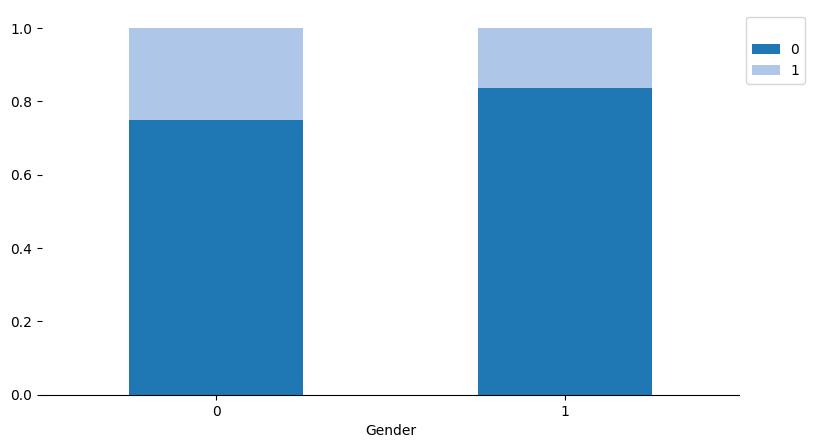

Exited,0,1,All
Age,,,
15-25,565,46,611
26-35,3241,301,3542
36-45,3003,733,3736
46-55,648,663,1311
56-65,277,259,536
66-75,185,34,219
76-85,41,1,42
86-95,3,0,3
All,7963,2037,10000


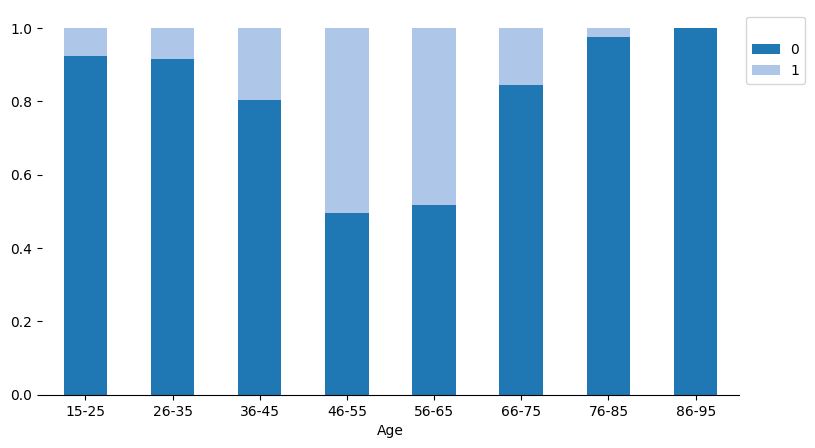

Exited,0,1,All
Tenure,,,
0,318,95,413
1,803,232,1035
2,847,201,1048
3,796,213,1009
4,786,203,989
5,803,209,1012
6,771,196,967
7,851,177,1028
8,828,197,1025


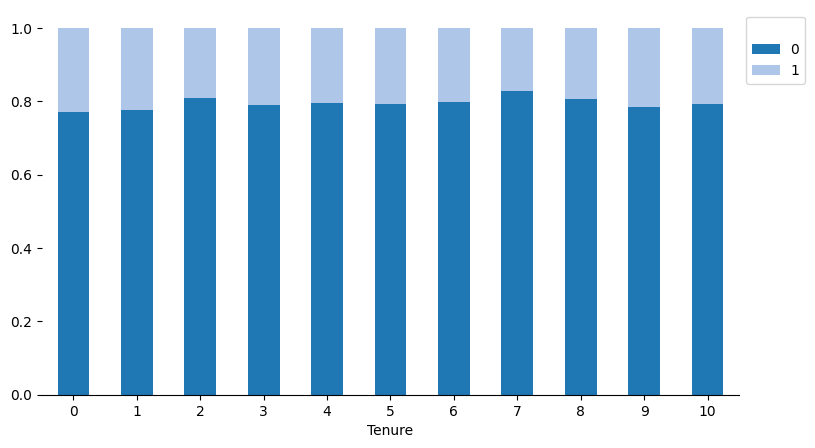

Exited,0,1,All
NumOfProducts,,,
1,3675,1409,5084
2,4242,348,4590
3,46,220,266
4,0,60,60
All,7963,2037,10000


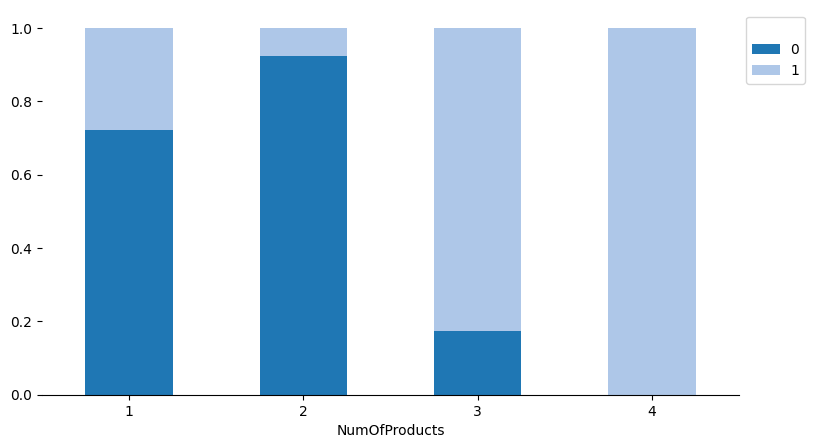

In [111]:

for i, variable in enumerate(cols):
       stacked_plot(df[variable])

In [112]:
crecol= ['CreditScore', 'Balance', 'EstimatedSalary']

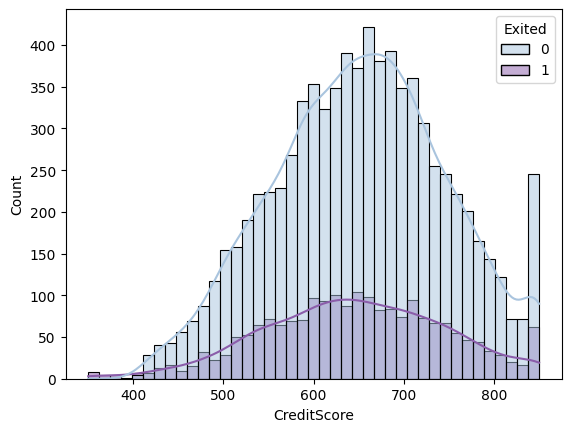

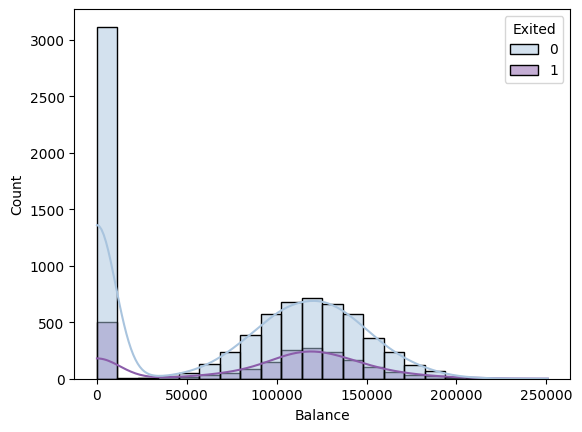

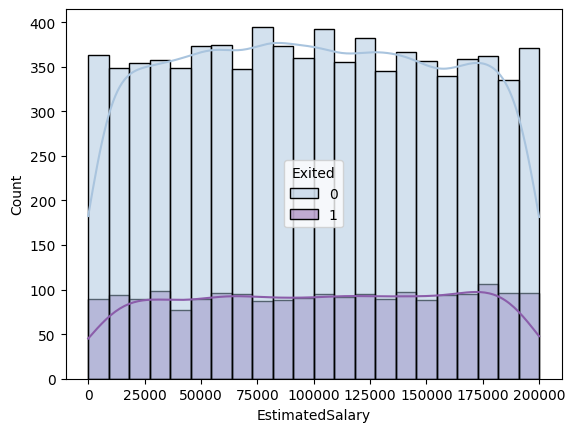

In [113]:
for i in crecol:
    sns.histplot (data = df, x= i, kde = True, hue = 'Exited', fill=True, palette='BuPu' )
    plt.show()

In [114]:
data = pd.read_csv('Churn_Modelling.csv')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# Feature Engineering

###### Công thức Balance / EstimatedSalary được sử dụng trong ngành tín dụng để đo lường mức độ nợ của một cá nhân so với thu nhập ước tính của họ. Công thức này được tính bằng cách chia số dư còn lại trên tài khoản hoặc tín dụng của khách hàng cho thu nhập ước tính của họ. Điều này giúp các tổ chức tín dụng đánh giá khả năng thanh toán của một khách hàng dựa trên mức độ nợ của họ so với thu nhập.

###### Balance = Số dư còn lại trên tài khoản hoặc tín dụng của khách hàng
###### EstimatedSalary = Thu nhập ước tính của họ

In [116]:
data['Balance_Estimated']= data['Balance']/data['EstimatedSalary']

# Data Preprocessing

In [117]:
cols_train =['Tenure','Gender','Geography', 'IsActiveMember'
             'Balance', 'NumOfProducts', 'EstimatedSalary','Age', 'Exited', 'Balaesti']

In [118]:
scale_var = ['Tenure',  'Balance', 'EstimatedSalary', 'IsActiveMember']

scaler = MinMaxScaler()
data[scale_var] = scaler.fit_transform(data[scale_var])

In [119]:
data['Gender']= LabelEncoder().fit_transform(data['Gender'])
data['Geography'] = LabelEncoder().fit_transform(data['Geography'])

In [120]:
data.drop(['RowNumber', 'CustomerId','Surname','CreditScore'], axis=1, inplace=True)

In [121]:
data

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Balance_Estimated
0,0,0,42,0.2,0.000000,1,1.0,0.506735,1,0.000000
1,2,0,41,0.1,0.334031,1,1.0,0.562709,0,0.744677
2,0,0,42,0.8,0.636357,3,0.0,0.569654,1,1.401375
3,0,0,39,0.1,0.000000,2,0.0,0.469120,0,0.000000
4,2,0,43,0.2,0.500246,1,1.0,0.395400,0,1.587055
...,...,...,...,...,...,...,...,...,...,...
9995,0,1,39,0.5,0.000000,2,0.0,0.481341,0,0.000000
9996,0,1,35,1.0,0.228657,1,1.0,0.508490,0,0.564108
9997,0,0,36,0.7,0.000000,1,1.0,0.210390,1,0.000000
9998,1,1,42,0.3,0.299226,2,0.0,0.464429,1,0.808230


In [122]:
data.isna().sum()

Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Balance_Estimated    0
dtype: int64

## Summary 
### 1.Các đặc trưng tương quan tốt với biến phản hồi: Age, NumOfProducts, Balance, EstimatedSalary, Geography, Tenure, EstimatedSalary, Gender, IsActiveMember,Balance_Estimated
### 2.Vậy từ bài toán dự đoán khách hàng rời bỏ thẻ tín dụng
    Vấn đề tiếp tục đặt ra ở đây là: Liệu chúng ta có thể sử dụng dữ liệu khách hàng như Age, NumOfProducts, Balance, EstimatedSalary, Geography, Tenure, EstimatedSalary, Gender, IsActiveMember, Balance_Estimated để dự đoán xem khách hàng có tiếp tục sử dụng dịch vụ này hay không?


# Train Model
    Decision Tree and Random forest

In [123]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [124]:
# Tách dữ liệu thành features và target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Decision Tree: Thuật toán máy học được sử dụng trong bài toán phân loại và hồi quy. Nó đưa ra các quyết định dựa trên các đặc trưng của dữ liệu đầu vào để dự đoán giá trị đầu ra. Cụ thể, cây quyết định chia tập dữ liệu thành các nhóm con dựa trên các thuộc tính của dữ liệu và xây dựng một cây quyết định để đưa ra dự đoán.

In [125]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [126]:
 # Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


    # Đánh giá hiệu suất mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8063333333333333


In [127]:
# Tính toán precision và recall trên tập kiểm tra
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Tính toán AUC trên tập kiểm tra
auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

Precision: 0.5025817555938038
Recall: 0.5
AUC: 0.6901903973509934


# Tăng cường dữ liệu

In [128]:
exited = data[data['Exited'] == 1]
existing = data[data['Exited'] == 0]

num_exited = len(exited)
num_existing = len(existing)

# Nếu số lượng mẫu trong nhóm "Existing" lớn hơn 0, thực hiện oversampling
if num_existing > 0:
    # Oversampling nhóm Exited để có số lượng mẫu tương đương với nhóm Existing
    exited_oversampled = resample(exited, replace=True, n_samples=num_existing, random_state=42)

    # Kết hợp lại dữ liệu sau khi oversampling
    data_oversampled = pd.concat([exited_oversampled, existing])

else:
    print("Không thể thực hiện oversampling vì số lượng mẫu trong nhóm 'Existing' là 0.")

In [129]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 5363 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geography          15926 non-null  int32  
 1   Gender             15926 non-null  int32  
 2   Age                15926 non-null  int64  
 3   Tenure             15926 non-null  float64
 4   Balance            15926 non-null  float64
 5   NumOfProducts      15926 non-null  int64  
 6   IsActiveMember     15926 non-null  float64
 7   EstimatedSalary    15926 non-null  float64
 8   Exited             15926 non-null  int64  
 9   Balance_Estimated  15926 non-null  float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 1.2 MB


In [130]:
# Tách dữ liệu thành features và target
X = data_oversampled.drop('Exited', axis=1)
y = data_oversampled['Exited']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [131]:
X_train

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Balance_Estimated
7045,0,0,36,0.6,0.000000,2,1.0,0.951008,0.000000
7397,1,1,47,0.4,0.395991,1,0.0,0.982785,0.505487
8719,0,0,44,0.6,0.534345,2,1.0,0.987898,0.678567
2973,0,0,56,0.9,0.513685,1,1.0,0.981246,0.656753
9750,0,0,51,0.8,0.282004,1,1.0,0.464587,0.761452
...,...,...,...,...,...,...,...,...,...
6876,0,0,42,1.0,0.000000,2,0.0,0.855520,0.000000
47,1,0,39,0.9,0.549402,1,1.0,0.588112,1.171914
2346,1,1,46,0.4,0.452877,1,0.0,0.463623,1.225376
9842,2,1,30,0.9,0.545275,2,1.0,0.533208,1.282865


In [132]:
# Huấn luyện mô hình RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Đánh giá hiệu suất mô hình

In [133]:
 # Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

    # Đánh giá hiệu suất mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9500941619585688


In [134]:
# Tính toán precision và recall trên tập kiểm tra
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Tính toán AUC trên tập kiểm tra
auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

Precision: 0.927810650887574
Recall: 0.9769470404984424
AUC: 0.9498903450436551


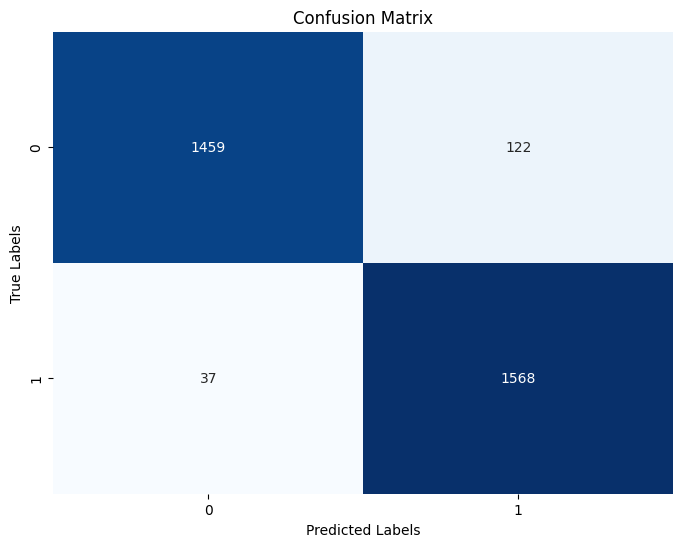

In [135]:
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 
    1. Cột 1, hàng 1 - TP(True Positive): Số lượng dự đoán chính xác. Là khi mô hình dự đoán đúng khách hàng ở lại. 
    2. Cột 2, hàng 1 - FP(False Positive - Type 1 Error): Số lượng các dự đoán sai lệch. Là khi mô hình dự đoán khách hàng ở lại và người đó rời đi.
    3. Cột 1, hàng 2 - FN(False Negative): Số lượng các dự đoán sai lệch một cách gián tiếp. Là khi mô hình dự đoán khách hàng ở lại nhưng khách hàng rời bỏ, tức là việc không chọn trường hợp khách hàng rời bỏ là sai. 
    4. Cột 2, hàng 2 - TN(True Negative): Số lượng các dự đoán chính xác một cách gián tiếp. Là khi mô hình dự đoán đúng khách hàng rời bỏ, tức là việc không chọn trường hợp khách hàng ở lại là chính xác.
    

### Ma trận nhầm lẫn(Confusion matrix) được sử dụng để đánh giá hiệu suất của mô hình phân loại trong học máy. Ma trận trên hiển thị số lượng dự đoán chính xác và không chính xác cho mỗi lớp trong tập dữ liệu. 
    Hàng: nhãn thực tế - Cột: nhãn dự đoán - Gía trị: số lượng mẫu dữ liệu thuộc mỗi cặp nhãn

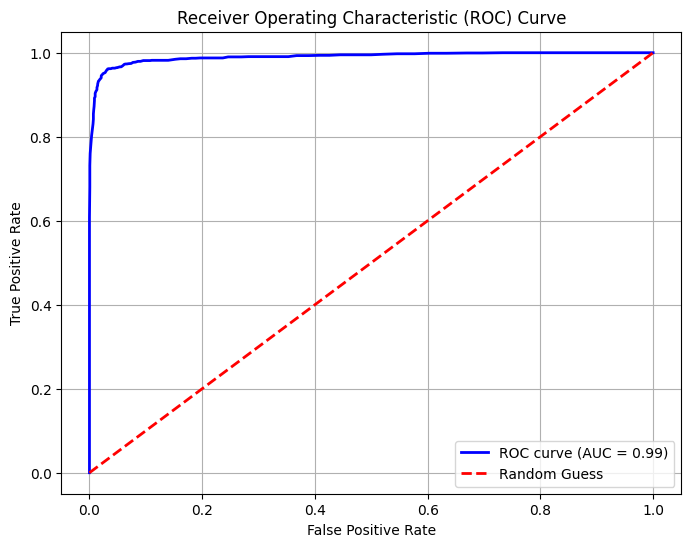

In [136]:
# Tính toán False Positive Rate (FPR) và True Positive Rate (TPR) cho mô hình Random Forest
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Tính toán diện tích dưới đường cong ROC (AUC)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
# Vẽ ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [137]:
# Tính precision và recall cho cả hai lớp
precision_exited = precision_score(y_test, y_pred, pos_label=1)
recall_exited = recall_score(y_test, y_pred, pos_label=1)

precision_existing = precision_score(y_test, y_pred, pos_label=0)
recall_existing = recall_score(y_test, y_pred, pos_label=0)

print("Precision for exited class:", precision_exited)
print("Recall for exited class:", recall_exited)

print("Precision for existing class:", precision_existing)
print("Recall for existing class:", recall_existing)


Precision for exited class: 0.927810650887574
Recall for exited class: 0.9769470404984424
Precision for existing class: 0.9752673796791443
Recall for existing class: 0.9228336495888678


In [138]:
f_score = (2* recall_exited* precision_exited)/(recall_exited+precision_exited)
f_score

0.9517450682852806

## Feture Importance


Feture Importance


<Axes: ylabel='Feature'>

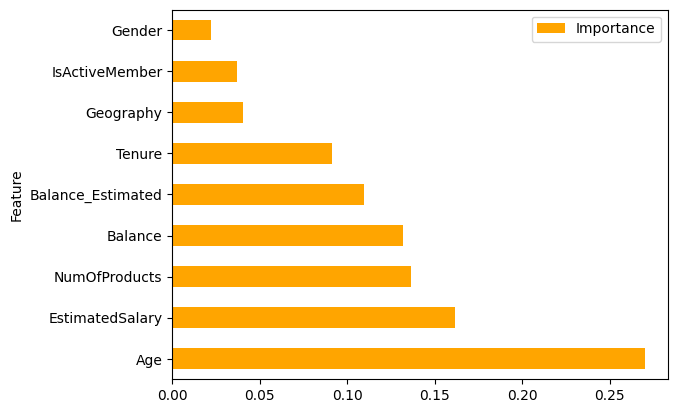

In [139]:
feture_importtance = model.feature_importances_
importantce_df = pd.DataFrame({'Feature': X.columns ,'Importance':feture_importtance} )
importantce_df = importantce_df.sort_values(by = 'Importance', ascending=False)
print('\nFeture Importance')
importantce_df.plot(kind='barh', x ='Feature', y='Importance', color='orange')

# Save Model


In [ ]:
import pickle

In [ ]:
# Lưu mô hình vào tệp 'random_forest_model.pkl'
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Đọc mô hình từ tệp 'random_forest_model.pkl'
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)